In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

In [87]:
spx = pd.read_csv("SPX_daily_bar.csv", index_col="Dates")
spx["Open Time"] = pd.to_datetime(spx["Open Time"])
spx["Close Time"] = pd.to_datetime(spx["Close Time"])
spx.head()

,Open Time,Open,Close Time,Close,IntradayRet
Dates,,,,,
2023-05-19,2023-05-19 09:30:00,4204.15,2023-05-19 16:00:00,4191.98,-0.002895
2023-05-22,2023-05-22 09:30:00,4190.78,2023-05-22 16:00:00,4192.63,0.000441
2023-05-23,2023-05-23 09:30:00,4176.80,2023-05-23 16:00:00,4145.58,-0.007475
2023-05-24,2023-05-24 09:30:00,4132.96,2023-05-24 16:00:00,4115.24,-0.004287
2023-05-25,2023-05-25 09:30:00,4155.71,2023-05-25 16:00:00,4151.28,-0.001066


In [88]:
xp1 = pd.read_csv("XP1.csv")
xp1["Dates"] = pd.to_datetime(xp1["Dates"])
xp1.head()

,Dates,Open,Close,Volume
0,2023-05-18 03:00:00,7260,7264,573
1,2023-05-18 03:30:00,7264,7269,257
2,2023-05-18 04:00:00,7270,7271,723
3,2023-05-18 04:30:00,7271,7266,349
4,2023-05-18 05:00:00,7266,7268,841


In [89]:
overlap_df = pd.merge(left=spx, right=xp1, left_on="Open Time", right_on="Dates", how="inner", suffixes=["", "_XP1_open"])
overlap_df = pd.merge(left=overlap_df, right=xp1, left_on="Close Time", right_on="Dates", how="inner", suffixes=["", "_XP1_close"])
overlap_df = overlap_df[["Dates", "Open Time", "Open", "Close Time", "Close", "IntradayRet", "Open_XP1_open", "Close_XP1_close"]]
overlap_df["IntradayRet_XP1"] = overlap_df["Close_XP1_close"] / overlap_df["Open_XP1_open"] - 1
overlap_df.head(10)

,Dates,Open Time,Open,Close Time,Close,IntradayRet,Open_XP1_open,Close_XP1_close,IntradayRet_XP1
0,2023-05-19 09:30:00,2023-05-19 09:30:00,4204.15,2023-05-19 16:00:00,4191.98,-0.002895,7310,7291,-0.002599
1,2023-05-22 09:30:00,2023-05-22 09:30:00,4190.78,2023-05-22 16:00:00,4192.63,0.000441,7287,7290,0.000412
2,2023-05-23 09:30:00,2023-05-23 09:30:00,4176.80,2023-05-23 16:00:00,4145.58,-0.007475,7270,7241,-0.003989
3,2023-05-24 09:30:00,2023-05-24 09:30:00,4132.96,2023-05-24 16:00:00,4115.24,-0.004287,7198,7188,-0.001389
4,2023-05-25 09:30:00,2023-05-25 09:30:00,4155.71,2023-05-25 16:00:00,4151.28,-0.001066,7150,7152,0.000280
5,2023-05-26 09:30:00,2023-05-26 09:30:00,4156.16,2023-05-26 16:00:00,4205.45,0.011860,7194,7245,0.007089
6,2023-05-30 09:30:00,2023-05-30 09:30:00,4226.71,2023-05-30 16:00:00,4205.52,-0.005013,7218,7187,-0.004295
7,2023-05-31 09:30:00,2023-05-31 09:30:00,4190.74,2023-05-31 16:00:00,4179.83,-0.002603,7097,7090,-0.000986
8,2023-06-01 09:30:00,2023-06-01 09:30:00,4183.03,2023-06-01 16:00:00,4221.02,0.009082,7119,7171,0.007304
9,2023-06-02 09:30:00,2023-06-02 09:30:00,4241.01,2023-06-02 16:00:00,4282.37,0.009752,7184,7232,0.006682


In [90]:
overlap_df[["IntradayRet", "IntradayRet_XP1"]].corr()

,IntradayRet,IntradayRet_XP1
IntradayRet,1.000000,0.809984
IntradayRet_XP1,0.809984,1.000000


In [91]:
y = overlap_df.IntradayRet_XP1
X = overlap_df.IntradayRet
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        IntradayRet_XP1   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     173.6
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.31e-23
Time:                        16:55:13   Log-Likelihood:                 433.40
No. Observations:                  93   AIC:                            -862.8
Df Residuals:                      91   BIC:                            -857.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.000      0.790      

In [92]:
y = overlap_df.IntradayRet_XP1
X = overlap_df.IntradayRet
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        IntradayRet_XP1   R-squared (uncentered):                   0.655
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              174.7
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                    5.52e-23
Time:                        16:55:13   Log-Likelihood:                          433.08
No. Observations:                  93   AIC:                                     -864.2
Df Residuals:                      92   BIC:                                     -861.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [93]:
overlap_df["y_hat"] = results.fittedvalues
overlap_df["resit"] = overlap_df["IntradayRet_XP1"] - overlap_df["y_hat"]
overlap_df["signal"] = zscore(overlap_df["resit"])
overlap_df.head()

,Dates,Open Time,Open,Close Time,Close,IntradayRet,Open_XP1_open,Close_XP1_close,IntradayRet_XP1,y_hat,resit,signal
0,2023-05-19 09:30:00,2023-05-19 09:30:00,4204.15,2023-05-19 16:00:00,4191.98,-0.002895,7310,7291,-0.002599,-0.001526,-0.001073,-0.551446
1,2023-05-22 09:30:00,2023-05-22 09:30:00,4190.78,2023-05-22 16:00:00,4192.63,0.000441,7287,7290,0.000412,0.000233,0.000179,-0.004636
2,2023-05-23 09:30:00,2023-05-23 09:30:00,4176.80,2023-05-23 16:00:00,4145.58,-0.007475,7270,7241,-0.003989,-0.003940,-0.000049,-0.104163
3,2023-05-24 09:30:00,2023-05-24 09:30:00,4132.96,2023-05-24 16:00:00,4115.24,-0.004287,7198,7188,-0.001389,-0.002260,0.000871,0.297428
4,2023-05-25 09:30:00,2023-05-25 09:30:00,4155.71,2023-05-25 16:00:00,4151.28,-0.001066,7150,7152,0.000280,-0.000562,0.000842,0.284709


In [94]:
overlap_df[(overlap_df["signal"] > 1) & (overlap_df["IntradayRet"] > 0)]

,Dates,Open Time,Open,Close Time,Close,IntradayRet,Open_XP1_open,Close_XP1_close,IntradayRet_XP1,y_hat,resit,signal
8,2023-06-01 09:30:00,2023-06-01 09:30:00,4183.03,2023-06-01 16:00:00,4221.02,0.009082,7119,7171,0.007304,0.004787,0.002517,1.016298
11,2023-06-06 09:30:00,2023-06-06 09:30:00,4271.34,2023-06-06 16:00:00,4283.85,0.002929,7134,7167,0.004626,0.001544,0.003082,1.262919
51,2023-08-03 09:30:00,2023-08-03 09:30:00,4494.27,2023-08-03 16:00:00,4501.89,0.001695,7220,7250,0.004155,0.000894,0.003261,1.341302
62,2023-08-18 09:30:00,2023-08-18 09:30:00,4344.88,2023-08-18 16:00:00,4369.71,0.005715,7032,7074,0.005973,0.003012,0.002960,1.209829
80,2023-09-14 09:30:00,2023-09-14 09:30:00,4487.78,2023-09-14 16:00:00,4505.10,0.003859,7226,7282,0.007750,0.002034,0.005715,2.412864
90,2023-09-28 09:30:00,2023-09-28 09:30:00,4269.65,2023-09-28 16:00:00,4299.70,0.007038,7044,7093,0.006956,0.003710,0.003246,1.334732
92,2023-12-01 09:30:00,2023-12-01 09:30:00,4559.43,2023-12-01 14:00:00,4589.15,0.006518,7092,7152,0.008460,0.003436,0.005024,2.111060


In [97]:
# This doesn't work that well as the other half, probably because if XP1 goes down more, there is more information than SPX movements
overlap_df[(overlap_df["signal"] < -1) & (overlap_df["IntradayRet"] < 0)]

,Dates,Open Time,Open,Close Time,Close,IntradayRet,Open_XP1_open,Close_XP1_close,IntradayRet_XP1,y_hat,resit,signal
10,2023-06-05 09:30:00,2023-06-05 09:30:00,4282.99,2023-06-05 16:00:00,4273.79,-0.002148,7230,7190,-0.005533,-0.001132,-0.004400,-2.004167
20,2023-06-20 09:30:00,2023-06-20 09:30:00,4396.11,2023-06-20 16:00:00,4388.71,-0.001683,7346,7313,-0.004492,-0.000887,-0.003605,-1.656899
31,2023-07-06 09:30:00,2023-07-06 09:30:00,4422.62,2023-07-06 16:00:00,4411.59,-0.002494,7056,7028,-0.003968,-0.001315,-0.002654,-1.241501
71,2023-08-31 09:30:00,2023-08-31 09:30:00,4517.01,2023-08-31 16:00:00,4507.66,-0.002070,7269,7237,-0.004402,-0.001091,-0.003311,-1.528612
73,2023-09-05 09:30:00,2023-09-05 09:30:00,4510.06,2023-09-05 16:00:00,4496.83,-0.002933,7305,7268,-0.005065,-0.001546,-0.003519,-1.619262
83,2023-09-19 09:30:00,2023-09-19 09:30:00,4445.41,2023-09-19 16:00:00,4443.95,-0.000328,7209,7188,-0.002913,-0.000173,-0.002740,-1.279183
85,2023-09-21 09:30:00,2023-09-21 09:30:00,4374.36,2023-09-21 16:00:00,4330.00,-0.010141,7088,7008,-0.011287,-0.005346,-0.005941,-2.677020


<Axes: >

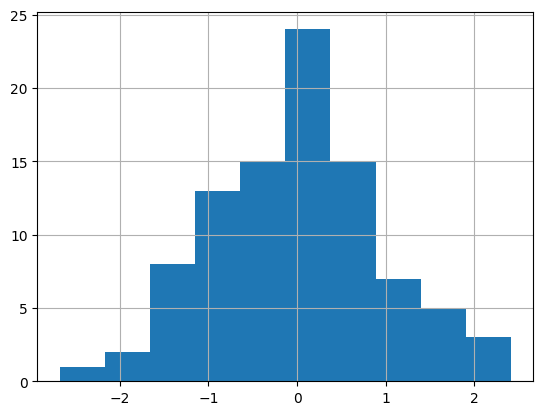

In [95]:
overlap_df["signal"].hist()

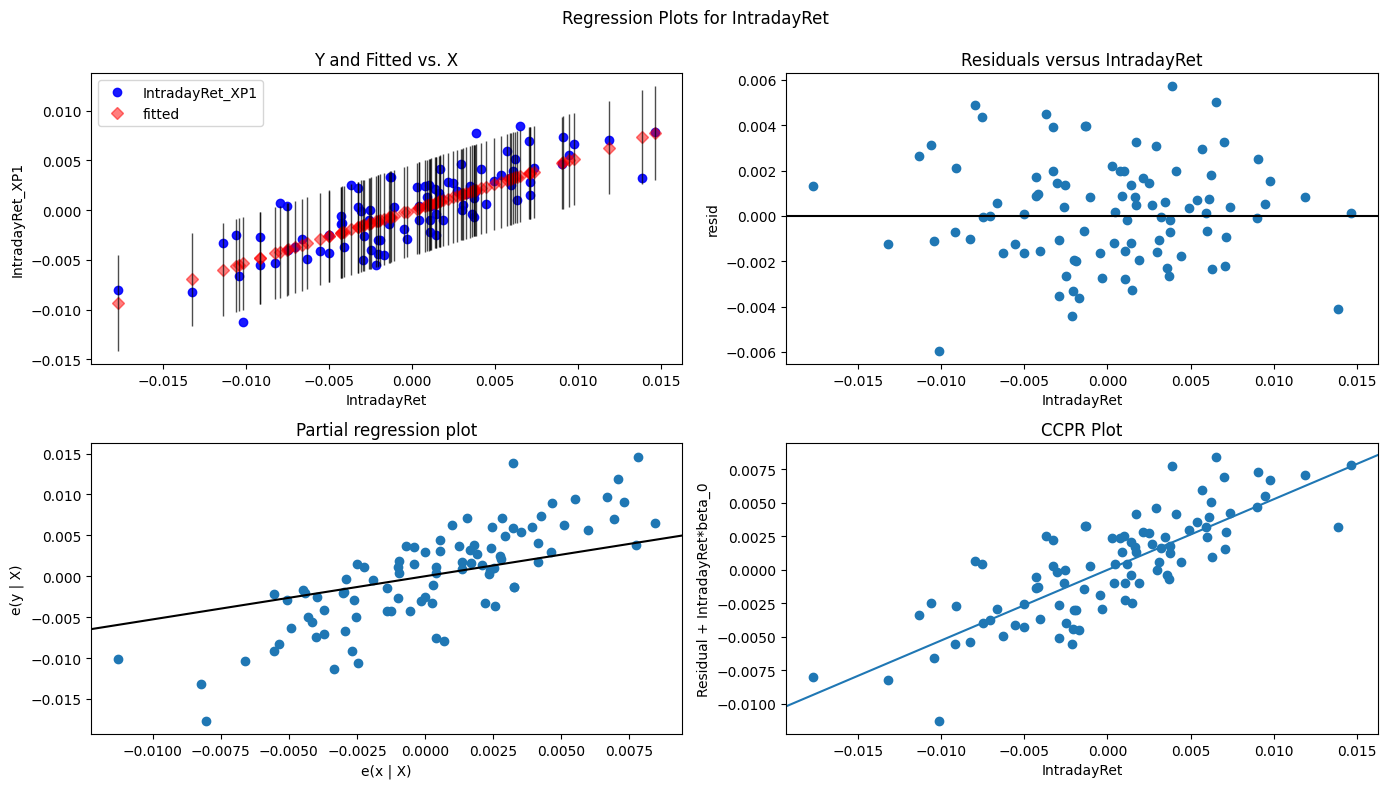

In [96]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(results, 'IntradayRet', fig=fig)

# Not Relevant
daily_df = pd.read_csv("SPX_AS51.csv", index_col="Dates")
daily_df.head()

daily_df["SPX Ret"] = daily_df["SPX Index"].pct_change()
daily_df["AS51 Ret"] = daily_df["AS51 Index"].pct_change()
daily_df.head()

X = daily_df[["SPX Ret"]][1:-1]
y = daily_df[["AS51 Ret"]][2:]

daily_model = sm.OLS(y.values, X)
daily_results = daily_model.fit()
print(daily_results.summary())